Beta: [ 0.08369761 -0.25848596]
Beta Std Error: [0.05767888 0.31006849]
Beta Covariance: [[ 0.00174368 -0.00776881]
 [-0.00776881  0.05039034]]
Residual Variance: 1.9079543180317624
Inverse Condition #: 0.09752355841633968
Reason(s) for Halting:
  Sum of squares convergence


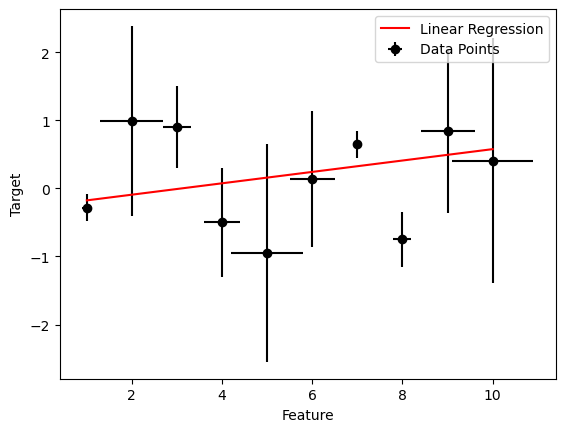

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#odr function from scipy package used to perform ODR regression
from scipy import odr
import random as r #importing random values I assume?

#Create a sample feature array and a target array
feature = np.array(np.arange(1,11))

#shuffle created array
np.random.shuffle(feature) #why is it necessary to shuffle the array?

#create a target array of random numbers
target = np.array([0.65, -0.75, 0.90, -0.5, 0.14, 0.84, 0.99, -0.95, 0.41, -0.28])
x_error = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10])
y_error = 2 * x_error

def target_function(p, x): 
    m, c = p
    return m*x + c

#model fit
odr_model = odr.Model(target_function)

#create a data object using sample data created
#data = odr.Data(feature, target)
data = Data(feature, target, wd=1./x_error**2., we=1./y_error**2)

#set ODR with the model and data
ordinal_distance_reg = odr.ODR(data, odr_model, beta0=[0.2, 1.])

#run the regression
out = ordinal_distance_reg.run()

#print the results
out.pprint()

#Plotting this figure 
#NOTE: Doesn't use point weight
x_fit = np.linspace(min(feature), max(feature), 100)
y_fit = target_function(out.beta, x_fit)

plt.errorbar(feature, target, xerr=x_error, yerr=y_error, label='Data Points', color = 'k', marker = 'o', linestyle= '')
plt.plot(x_fit, y_fit, label='Linear Regression', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

def linear_func(B, x):
    return B[0]*x+B[1]

x_data=np.array([0.0, 1.0, 2.0, 3.0])
y_data=np.array([0.0, 1.0, 2.0, 3.0])
x_err=np.array([1.0, 1.0, 1.0, 1.0])
y_err=np.array([5.0, 5.0, 5.0, 5.0])

linear=Model(linear_func)
data=RealData(x_data, y_data, sx=x_err, sy=y_err)
odr=ODR(data, linear, beta0=[1.0, 0.0])
out=odr.run()
out.pprint()

Beta: [1. 0.]
Beta Std Error: [0. 0.]
Beta Covariance: [[ 5.20000039 -7.80000026]
 [-7.80000026 18.1999991 ]]
Residual Variance: 0.0
Inverse Condition #: 0.031539738669233985
Reason(s) for Halting:
  Sum of squares convergence
